In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Заванатаження данних

In [26]:
df = pd.read_csv("Housing.csv")
df.head(6)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In [27]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [28]:
x_columns = ["area", "bedrooms","bathrooms"]
y_column = "price"
data_columns = [y_column] + x_columns
data_columns

['price', 'area', 'bedrooms', 'bathrooms']

In [29]:
df_work = df[data_columns]
df_work.head()

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


Функція нормалізації данних

In [30]:
def normalization(data: np.array):
  mean_ = np.mean(data, axis=0)
  std = np.std(data, axis=0)
  normalize_data = (data - mean_)/std
  return normalize_data

Нормалізація данних

In [31]:
norm = pd.DataFrame()

norm['price'] = normalization(df.price)
norm['area'] = normalization(df.area)
norm['bedrooms'] = normalization(df.bedrooms)
norm['bathrooms'] = normalization(df.bathrooms)
print(norm.head(7))

      price      area  bedrooms  bathrooms
0  4.566365  1.046726  1.403419   1.421812
1  4.004484  1.757010  1.403419   5.405809
2  4.004484  2.218232  0.047278   1.421812
3  3.985755  1.083624  1.403419   1.421812
4  3.554979  1.046726  1.403419  -0.570187
5  3.255309  1.083624  0.047278   3.413810
6  2.880722  1.581745  1.403419   3.413810


Нормалізація данних за допомогою sklearn

In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
normal = df[data_columns]
ss.fit(normal)
normal = ss.transform(df[data_columns])
print(normal)

[[ 4.56636513  1.04672629  1.40341936  1.42181174]
 [ 4.00448405  1.75700953  1.40341936  5.40580863]
 [ 4.00448405  2.21823241  0.04727831  1.42181174]
 ...
 [-1.61432675 -0.70592066 -1.30886273 -0.57018671]
 [-1.61432675 -1.03338891  0.04727831 -0.57018671]
 [-1.61432675 -0.5998394   0.04727831 -0.57018671]]


# Функція гіпотези лінійної регресії у векторному виглядi

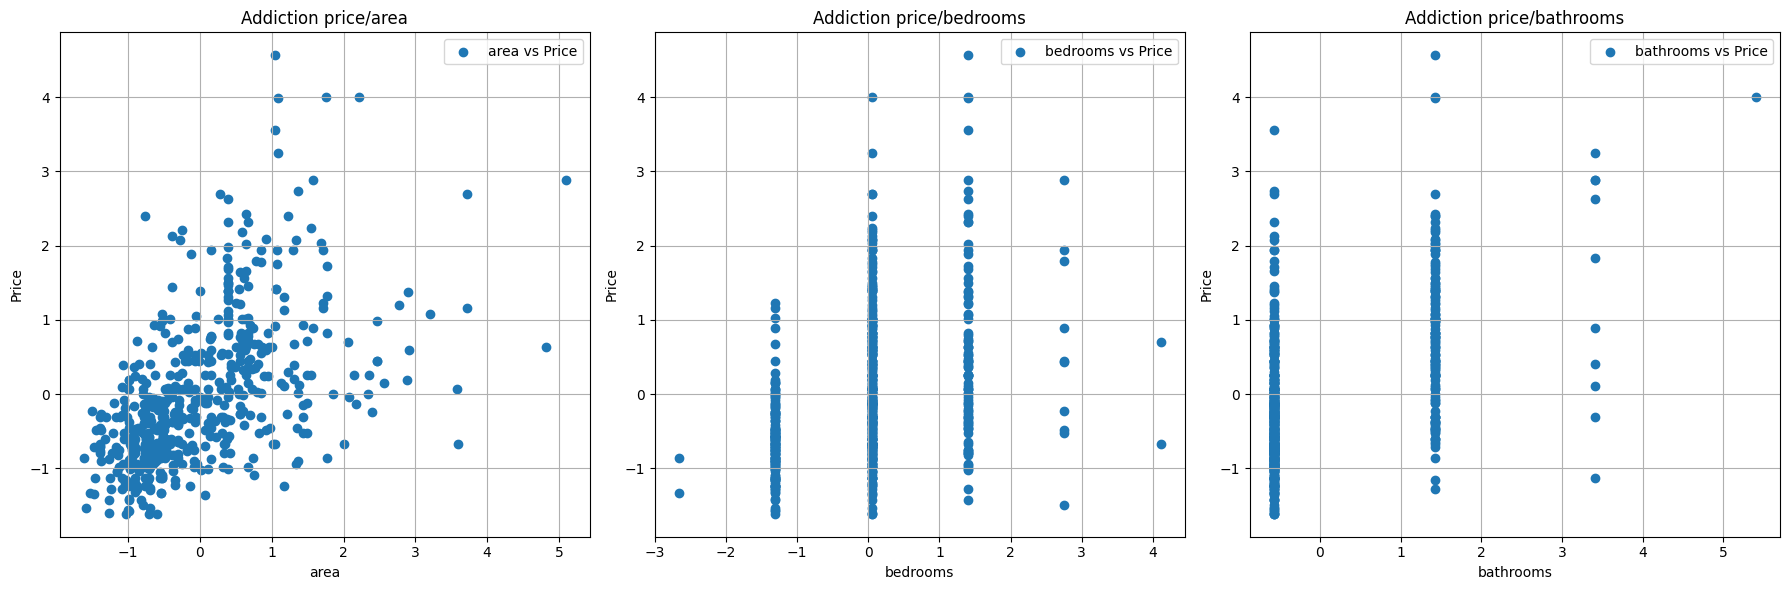

In [33]:
fg, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(x_columns):
    ax[i].scatter(norm[feature], norm[y_column], label=f'{feature} vs Price')
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('Price')
    ax[i].set_title(f'Addiction price/{feature}')
    ax[i].legend()
    ax[i].grid(True)

plt.tight_layout()
plt.show()
     

In [34]:
def h_m(X, w):
    return np.dot(X, w)

In [35]:
def loss_function_m(X, y, w):
    m = len(y) 
    predictions = h_m(X, w)  
    cost = np.sum(np.square(predictions - y)) / (2 * m)
    return cost


Функція градієнтного спуску

In [36]:
def gradient_descent_step(X, y, w, learning_rate):
    m = len(y) 
    predictions = h_m(X, w) 
    errors = predictions - y 
    gradient = (1 / m) * np.dot(X.T, errors)
    w = w - learning_rate * gradient 
    return w
     
def grad_descent(w:np.array, df:pd.DataFrame, num_iter:int,
                     x_columns:list, y_column:str,
                     learning_rate:float=0.01, epsilon:float=0.01) -> tuple[list, list]:
  features = df[x_columns].values
  y_data = df[y_column].values
  x_matrix = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1).astype("int64")
  w = gradient_descent_step(x_matrix, y_data, w, learning_rate=learning_rate)
  loss = loss_function_m(x_matrix, y_data, w)
  history_loss = [loss]
  for i in range(1, num_iter):
    w = gradient_descent_step(x_matrix, y_data, w, learning_rate=learning_rate)
    loss = loss_function_m(x_matrix, y_data, w)
    delta = abs(loss-history_loss[-1])
    if  delta < epsilon:
      print(f"{delta=}, {epsilon=}")
      break
    history_loss.append(loss)
  return w, history_loss

Найкращі параметри вагів для датасету - прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень. Використовуємо нормалізований датасет

In [37]:
n = norm.shape[1]
w_t = np.zeros((n))
learning_rate_norm = 0.011
num_iter = 1000


w_optimal_norm, history_loss_norm = grad_descent(w_t, norm,
                                              num_iter, x_columns, y_column,
                                              learning_rate=learning_rate_norm,  epsilon=0.000001)

print(f"{len(history_loss_norm)=}")
print(f"{(history_loss_norm)=}")

print("\nОптимальні значення для нормалізованих параметрів (w):")
print(w_optimal_norm)

delta=9.9817733345553e-07, epsilon=1e-06
len(history_loss_norm)=935
(history_loss_norm)=[0.4975182534144589, 0.49507371038803577, 0.4926657438617129, 0.4902937385638963, 0.4879570907664447, 0.4856552080461453, 0.48338750905150824, 0.48115342327475547, 0.4789523908288797, 0.47678386222965885, 0.4746472981825033, 0.47254216937402893, 0.4704679562682413, 0.468424148907224, 0.4664102467162267, 0.46442575831304894, 0.4624702013216207, 0.46054310218968, 0.45864399601045364, 0.45677242634824855, 0.4549279450678594, 0.453110112167708, 0.45131849561662546, 0.4495526711941924, 0.4478122223345567, 0.4460967399736463, 0.4444058223996989, 0.44273907510703436, 0.4410961106529902, 0.439476548517953, 0.43788001496840834, 0.43630614292294667, 0.43475457182114974, 0.4332249474952977, 0.43171692204482903, 0.43023015371349, 0.4287643067691144, 0.4273190513859706, 0.4258940635296199, 0.4244890248442263, 0.42310362254226425, 0.4217375492965687, 0.42039050313467274, 0.4190621873353847, 0.4177523103275493, 0.

Графік функції втрат (Loss Function Plot): Відображає значення функції втрат на кожній ітерації градієнтного спуску, що показує, як модель навчається з часом.

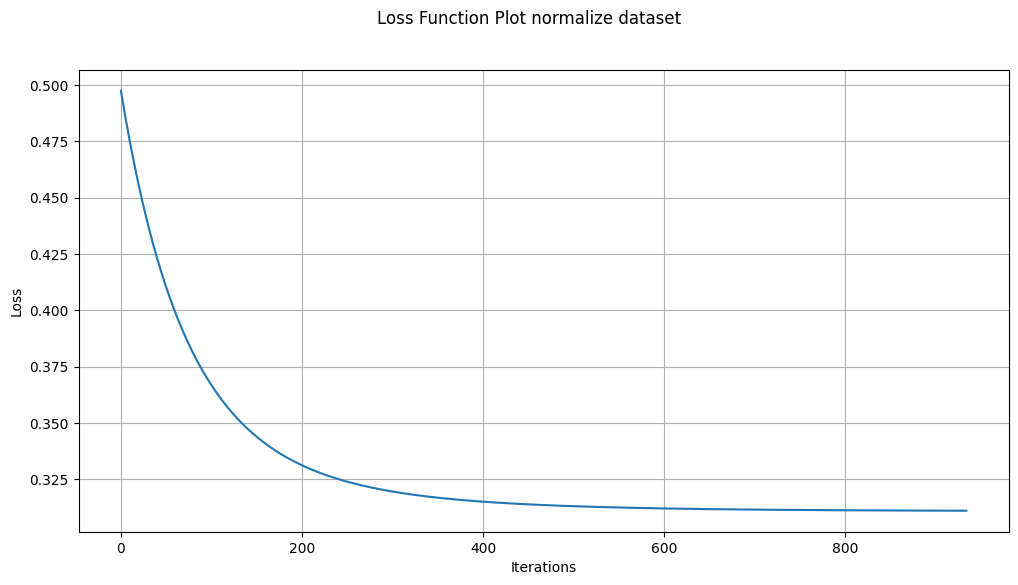

In [38]:
plt.figure(figsize=(12,6))
plt.suptitle("Loss Function Plot normalize dataset")
plt.plot(history_loss_norm)
plt.grid()
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

Результат

In [39]:
print("Градієнтний спуск coefficients:", w_optimal_norm[1:])
print("Градієнтний спуск intercept:", w_optimal_norm[0])

Градієнтний спуск coefficients: [0.44862147 0.27850948 0.61617219]
Градієнтний спуск intercept: -0.2269932453240074


Створимо нашу модель за допомогою Scikit learn Linear Regression

Коефіцієнти регресії (ваги): [0.40082084 0.14213176 0.38208794]
Перехоплення (intercept): -0.016281754425403194
Середньоквадратична похибка (MSE): 0.7874977192141875
Корінь середньоквадратичної похибки (RMSE): 0.8874106823867896
['area', 'bedrooms', 'bathrooms']


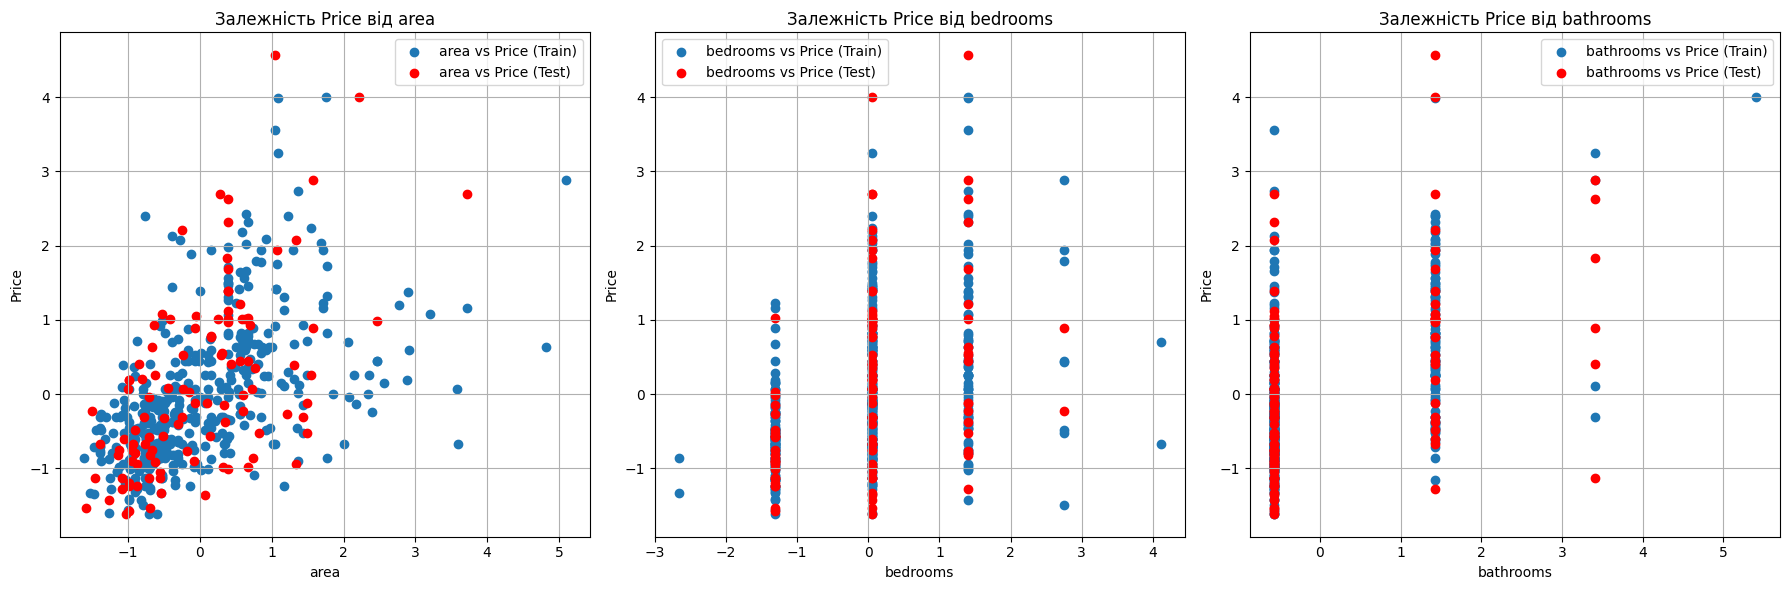

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  
from sklearn import linear_model
model = LinearRegression()
X = norm[x_columns]
y = norm[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Коефіцієнти регресії (ваги):", model.coef_)
print("Перехоплення (intercept):", model.intercept_)
print("Середньоквадратична похибка (MSE):", mse)
print("Корінь середньоквадратичної похибки (RMSE):", rmse)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

features = x_columns
print(features)
for i, feature in enumerate(features):
    axs[i].scatter(X_train[features[i]], y_train, label=f'{feature} vs Price (Train)')
    axs[i].scatter(X_test[features[i]], y_test, label=f'{feature} vs Price (Test)', color='r')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Price')
    axs[i].set_title(f'Залежність Price від {feature}')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

Зрівняємо дані

In [41]:
model.coef_



array([0.40082084, 0.14213176, 0.38208794])

In [42]:
model.intercept_


-0.016281754425403194

In [43]:

w_optimal_norm

array([-0.22699325,  0.44862147,  0.27850948,  0.61617219])

Візуалізація результату

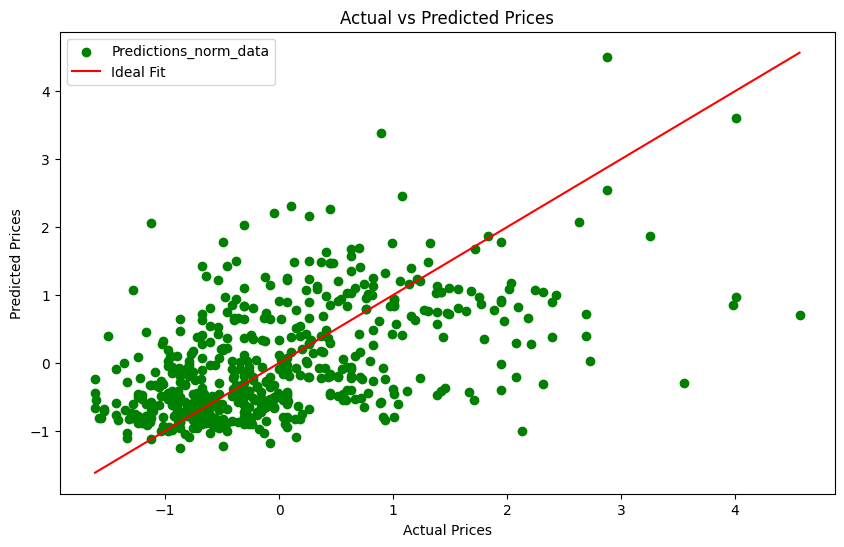

In [44]:
y = norm[y_column]
X = norm[data_columns]
predictions = h_m(X, w_optimal_norm)
plt.figure(figsize=(10, 6))
plt.scatter(y , predictions, label='Predictions_norm_data', c='g')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()
     

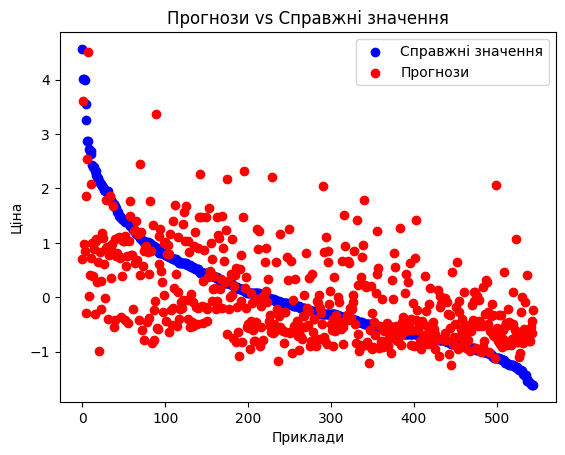

In [45]:
def plot_predictions_vs_actual(X, Y, w):
    predictions = h_m(X, w)
    plt.scatter(range(len(Y)), Y, color='blue', label='Справжні значення')
    plt.scatter(range(len(Y)), predictions, color='red', label='Прогнози')
    plt.title("Прогнози vs Справжні значення")
    plt.xlabel("Приклади")
    plt.ylabel("Ціна")
    plt.legend()
    plt.show()

plot_predictions_vs_actual(norm[data_columns], norm[y_column], w_optimal_norm)

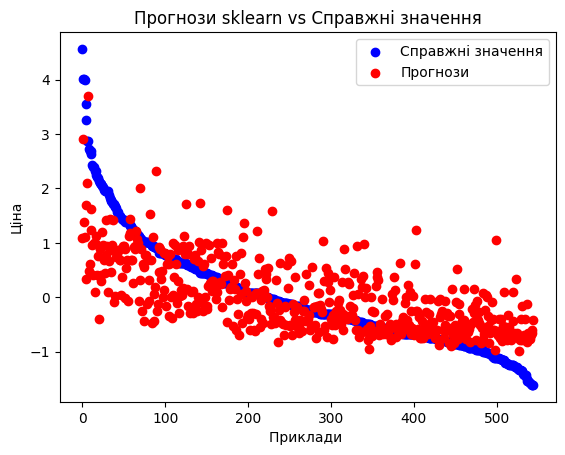

In [46]:
w_sklearn = [model.intercept_] + list(model.coef_)
def plot_predictions_vs_actual(X, y, w):
    predictions = h_m(X, w)
    plt.scatter(range(len(y)), y, color='blue', label='Справжні значення')
    plt.scatter(range(len(y)), predictions, color='red', label='Прогнози')
    plt.title("Прогнози sklearn vs Справжні значення")
    plt.xlabel("Приклади ")
    plt.ylabel("Ціна")
    plt.legend()
    plt.show()

plot_predictions_vs_actual(norm[data_columns], norm[y_column], w_sklearn)

(545, 4)


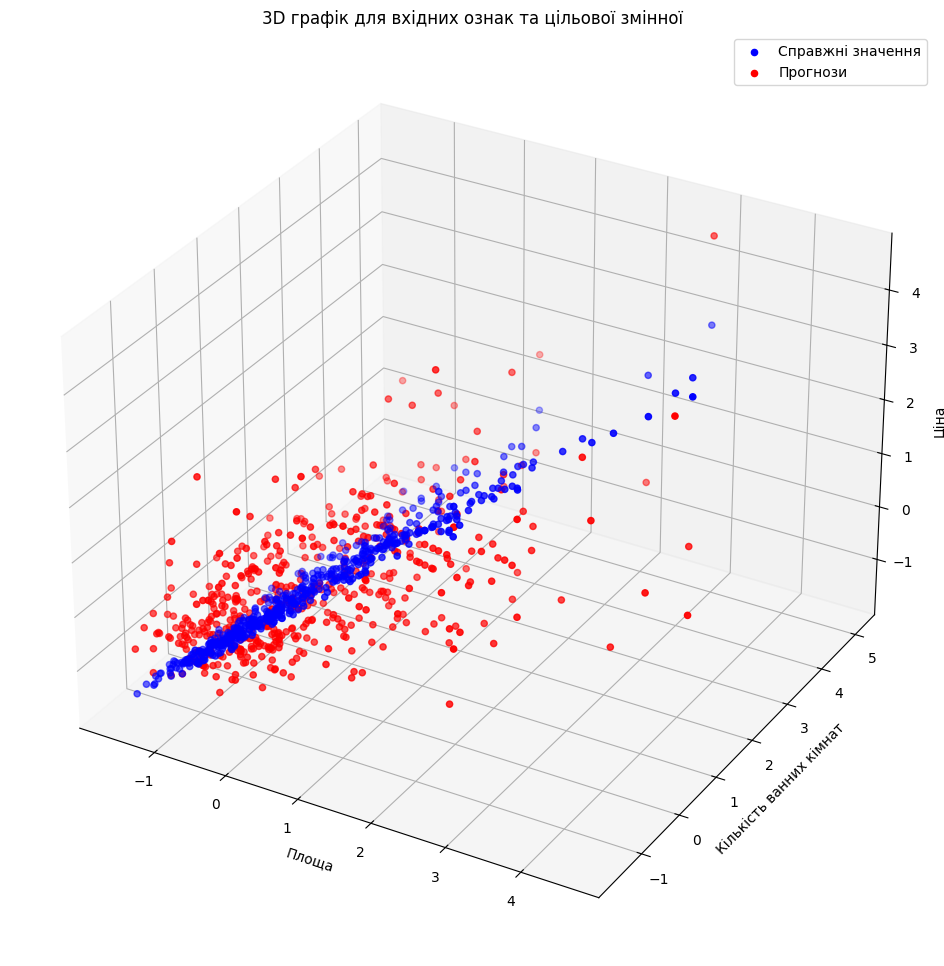

In [47]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(X, y, w):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X['price'], X['area'], y, color='blue', label='Справжні значення')

    predictions = h_m(X, w)
    ax.scatter(X['price'], X['area'], predictions, color='red', label='Прогнози')

    ax.set_xlabel('Площа')
    ax.set_ylabel('Кількість ванних кімнат')
    ax.set_zlabel('Ціна')
    plt.title("3D графік для вхідних ознак та цільової змінної")
    ax.zaxis.label.set_rotation(90)
    ax.legend()
    plt.show()
    
print(X.shape)
if X.shape[1] == 4:
    plot_3d(norm[data_columns], norm[y_column], w_optimal_norm)

Знайдіть ці ж параметри за допомогою аналітичного рішення;

In [48]:
features = norm[x_columns].values
y_data = norm[y_column].values
x_matrix = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1).astype("int64")

w_analytic = np.linalg.inv(x_matrix.T @ x_matrix) @ x_matrix.T @ y_data

print("Аналітичне рішення coefficients:", w_analytic[1:])
print("Аналітичне рішення intercept:", w_analytic[0])

Аналітичне рішення coefficients: [0.44901403 0.26284288 0.64802744]
Аналітичне рішення intercept: -0.24099288544090813


Звіримо наші аналітичні дані з даними з методу градієнтного спуску

In [49]:
print(w_optimal_norm)
print(w_analytic)

[-0.22699325  0.44862147  0.27850948  0.61617219]
[-0.24099289  0.44901403  0.26284288  0.64802744]


Діаграми

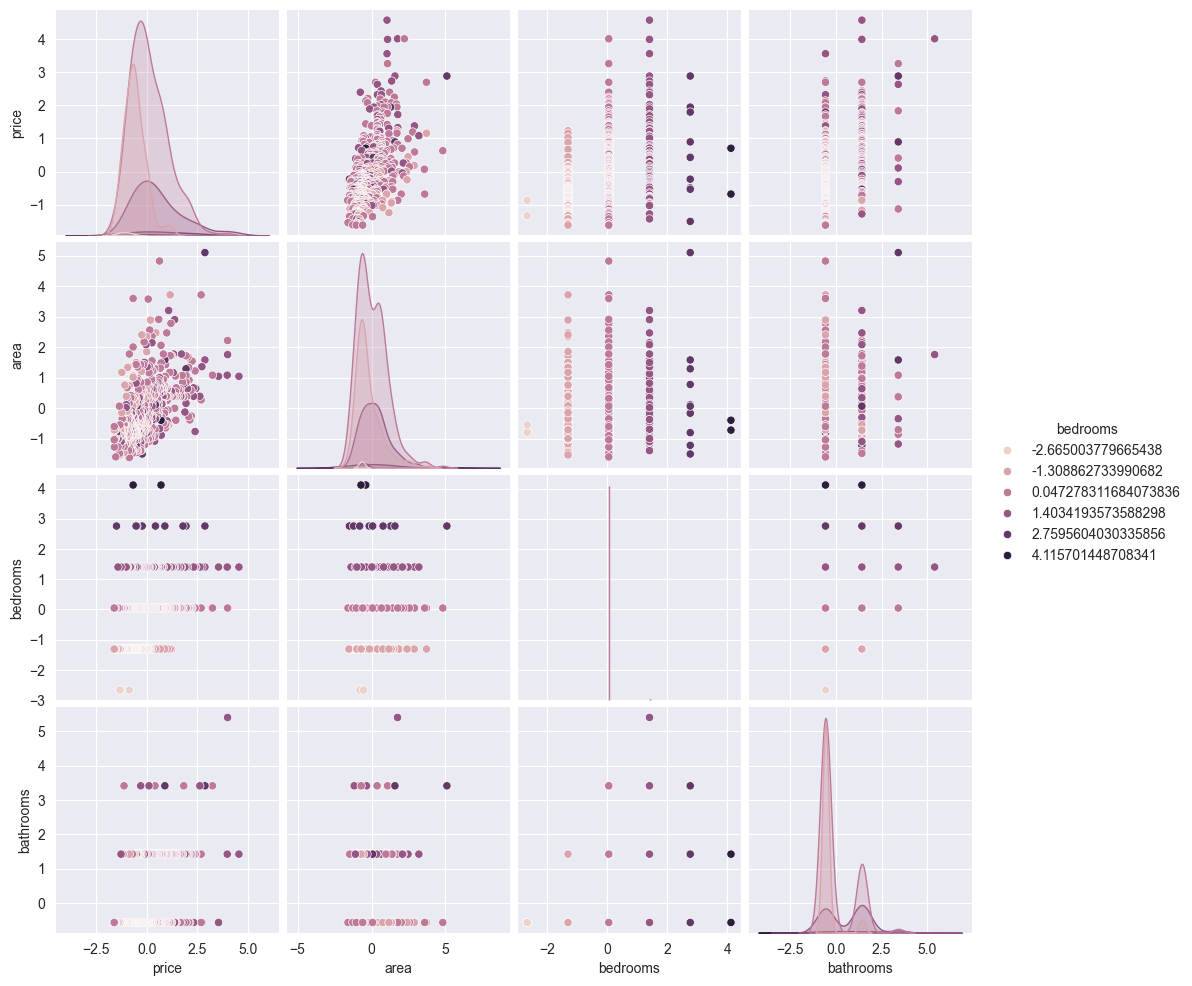

In [50]:
sns.set_style('darkgrid')
sns.pairplot(norm, vars = data_columns, hue ='bedrooms')
plt.show()